In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys

%matplotlib inline

In [7]:
sys.path.append('..')
import llmkg

%load_ext autoreload
%autoreload 2

BERT_bert-base-cased_FB15k-237 [1.0318288517577193e-28, 3.293093128782199e-39, 1.0646613169823813e-23, 4.0523311578610355e-33, 4.7056955045565463e-35, 5.7057023392622204e-36, 1.0595650393816875e-24, 1.1252246411765856e-27, 1.9030349043082462e-28, 5.896410550620095e-32, 2.7087469163536016e-24, 5.501733330801688e-38, 2.6335543347358058e-28, 1.0055279953028692e-34, 6.865898097847456e-30, 2.5282121787594905e-32, 7.3539662803530435e-37, 1.9001162922609502e-30, 2.5337049519098825e-27, 8.444681003271421e-33, 4.3399302008335374e-35, 1.9373663322254646e-30, 1.4805975142387307e-20, 6.99581923373317e-37, 1.8023063317365262e-24]
BERT_roberta-base_FB15k-237 [2.4368855773211705e-23, 1.3315603605115863e-22, 4.9003996641001314e-08, 1.433091664771509e-14, 7.226604903845878e-22, 5.126180589476684e-22, 9.560109403902726e-08, 1.688201536414873e-24, 1.780948584203539e-17, 2.697803617894701e-19, 6.856581479296386e-24, 2.1922725656504126e-09, 7.115317941091133e-28, 1.2162270637939229e-13, 2.098317230216814e-

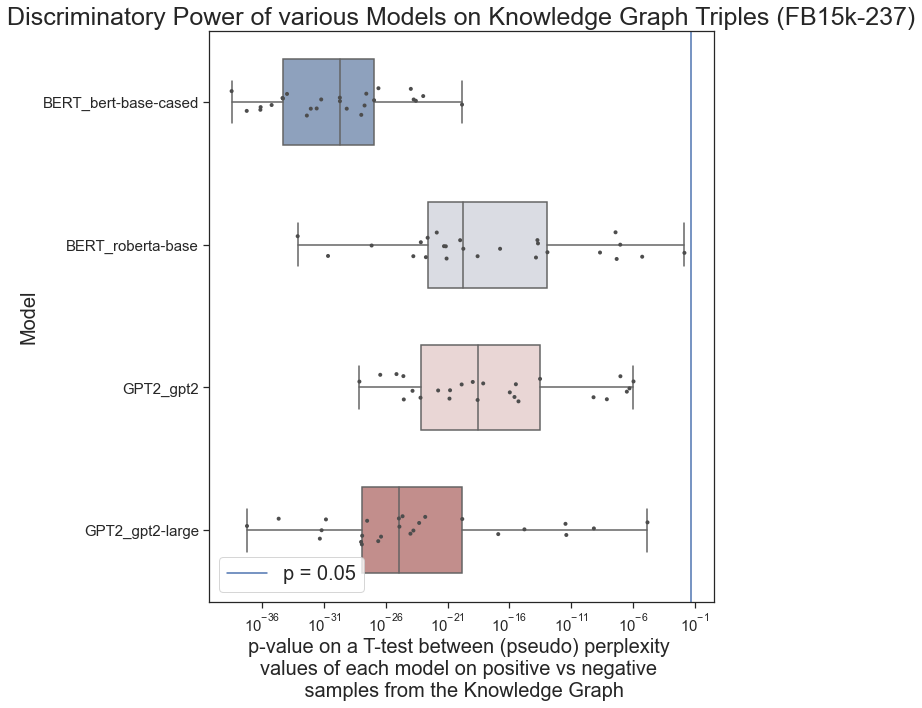

In [13]:
data = {
        'values': [],
        'runs': []
    }

model_graph_pairings = [("BERT_bert-base-cased", "FB15k-237"),('BERT_roberta-base', 'FB15k-237'), ('GPT2_gpt2', 'FB15k-237'), ('GPT2_gpt2-large', 'FB15k-237')]
runs, samples = 25, 1000

for model, graph in model_graph_pairings:
    p_vals = llmkg.get_pvals('../results', model, graph, runs, samples)

    data['values'] += p_vals
    data['runs'] += [f"{model}" for i in range(runs)]

    print(f"{model}_{graph}", p_vals)

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))

ax.set_xscale('log')
ax.set_title('Discriminatory Power of various Models on Knowledge Graph Triples (FB15k-237)', fontsize=25)


plt.axvline(0.05, label='p = 0.05')
#plt.xlim(1e-12,1)

plt.legend(fontsize=20)


#sns.distplot(data['values'], label=)
#Plot the orbital period with horizontal boxes
sns.boxplot(x="values", y="runs", data=pd.DataFrame(data),
            whis=[0, 100], width=.6, palette="vlag")


#Add in points to show each observation
sns.stripplot(x="values", y="runs", data=data,
           size=4, color=".3", linewidth=0)

ax.set_xlabel('p-value on a T-test between (pseudo) perplexity \nvalues of each model on positive vs negative \n samples from the Knowledge Graph', fontsize=20)
ax.set_ylabel('Model', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('../results/fb15k.png')
plt.show()



BERT_bert-base-cased_WN18RR [5.211756872328169e-34, 2.759902554832725e-47, 1.0376328787215714e-31, 2.8748754658847234e-45, 1.8652695507324175e-44, 1.90436730542144e-38, 2.713321257786046e-34, 6.52681246990072e-33, 4.413136638392424e-38, 1.0207886701053338e-32, 6.041590645256021e-21, 9.484272879217646e-43, 1.9939042575410906e-36, 1.0653023353706166e-37, 4.1213457063783595e-28, 6.729488840827972e-40, 4.6467507308552605e-38, 1.8931429415496464e-33, 3.2342829643153305e-38, 4.995747485381766e-43, 2.489526166590134e-26, 6.092286628310687e-43, 1.9537521551812175e-42, 1.997294425018338e-39, 5.0245984942568894e-40]
BERT_roberta-base_WN18RR [3.958316383364943e-39, 1.8650100306562928e-34, 5.0287151829445524e-42, 2.373799669730684e-43, 4.3904463361482735e-24, 3.2948992967065745e-43, 4.813820602802484e-48, 1.6191149981713252e-35, 1.9667274601547693e-31, 9.3291368779277e-37, 1.3474031829280328e-26, 9.040846625087142e-49, 2.0787641995377731e-50, 3.129313596512136e-43, 1.0215630550086045e-46, 2.730085

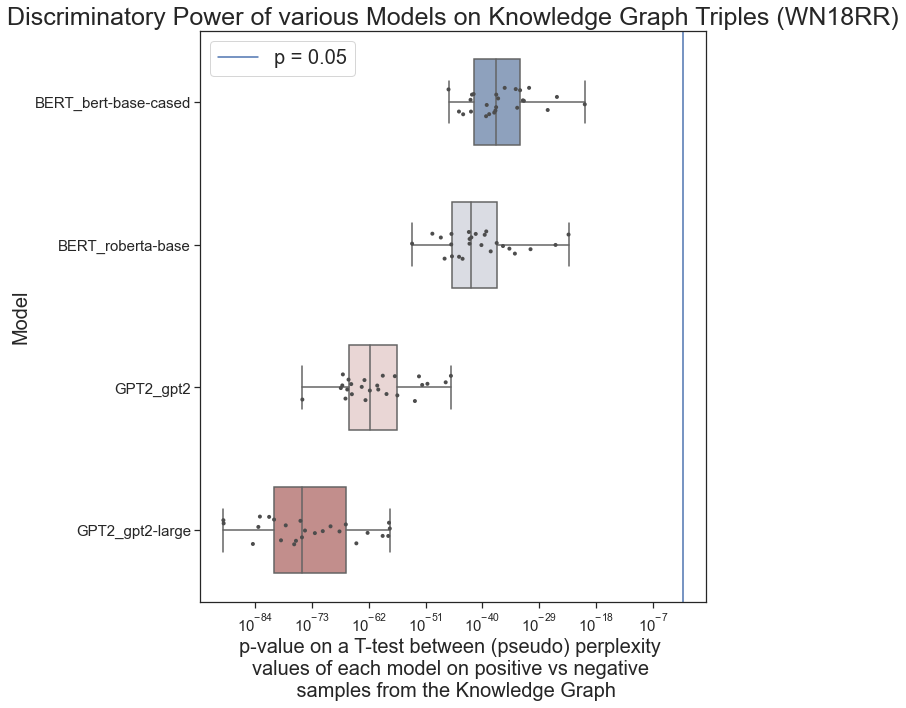

In [21]:
data = {
        'values': [],
        'runs': []
    }

model_graph_pairings = [("BERT_bert-base-cased", "WN18RR"),('BERT_roberta-base', 'WN18RR'), ('GPT2_gpt2', 'WN18RR'), ('GPT2_gpt2-large', 'WN18RR')]
runs, samples = 25, 1000

for model, graph in model_graph_pairings:
    p_vals = llmkg.get_pvals('../results', model, graph, runs, samples)

    data['values'] += p_vals
    data['runs'] += [f"{model}" for i in range(25)]

    print(f"{model}_{graph}", p_vals)

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 10))

ax.set_xscale('log')
ax.set_title('Discriminatory Power of various Models on Knowledge Graph Triples (WN18RR)', fontsize=25)


plt.axvline(0.05, label='p = 0.05')
#plt.xlim(1e-12,1)

plt.legend(fontsize=20)


#sns.distplot(data['values'], label=)
#Plot the orbital period with horizontal boxes
sns.boxplot(x="values", y="runs", data=pd.DataFrame(data),
            whis=[0, 100], width=.6, palette="vlag")


#Add in points to show each observation
sns.stripplot(x="values", y="runs", data=data,
           size=4, color=".3", linewidth=0)

ax.set_xlabel('p-value on a T-test between (pseudo) perplexity \nvalues of each model on positive vs negative \n samples from the Knowledge Graph', fontsize=20)
ax.set_ylabel('Model', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('../results/wn18rr.png')
plt.show()


Graph: [FB15k-237], Model: [GPT2_gpt2] mean: 8.37e-08 stdev: 2.45e-07
Graph: [WN18RR], Model: [GPT2_gpt2] mean: 3.52e-48 stdev: 1.57e-47
Graph: [FB15k-237], Model: [GPT2_gpt2-large] mean: 6.12e-07 stdev: 3.00e-06
Graph: [WN18RR], Model: [GPT2_gpt2-large] mean: 1.10e-59 stdev: 3.05e-59
Graph: [FB15k-237], Model: [BERT_bert-base-cased] mean: 5.93e-22 stdev: 2.90e-21
Graph: [WN18RR], Model: [BERT_bert-base-cased] mean: 2.42e-22 stdev: 1.18e-21
Graph: [FB15k-237], Model: [BERT_roberta-base] mean: 5.98e-04 stdev: 2.93e-03
Graph: [WN18RR], Model: [BERT_roberta-base] mean: 1.76e-25 stdev: 8.60e-25


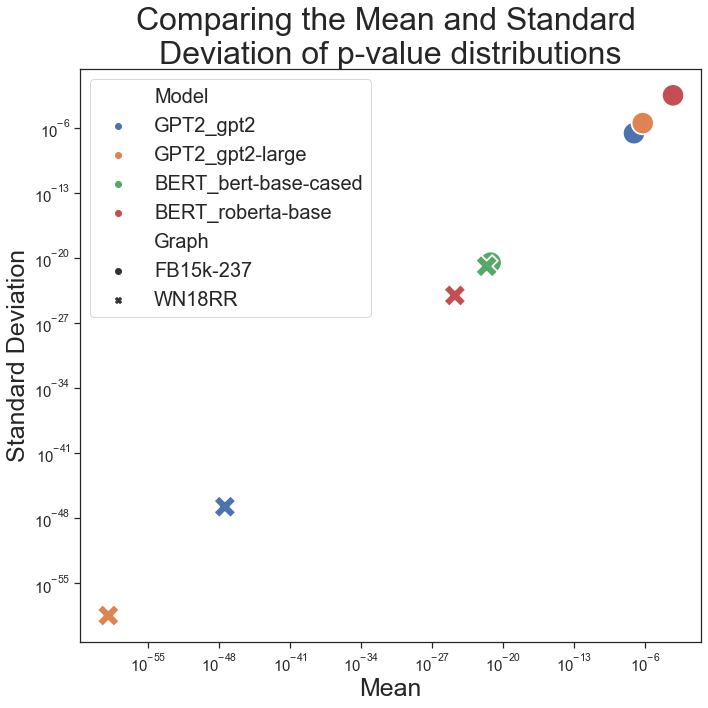

In [26]:
r, n = 25, 1000

summary_stats = []
data = pd.DataFrame(columns=['Graph', 'Model', 'Mean', 'Standard Deviation'])
for model in ['GPT2_gpt2', 'GPT2_gpt2-large', 'BERT_bert-base-cased', 'BERT_roberta-base']:
    for graph in ['FB15k-237', 'WN18RR']:
        p_vals = np.array(llmkg.get_pvals('../results', model, graph, r, n))
        print(f"Graph: [{graph}], Model: [{model}] mean: {np.mean(p_vals):.2e} stdev: {np.std(p_vals):.2e}")
        summary_stats.append((model, graph, np.mean(p_vals), np.std(p_vals)))
        data = data.append({'Graph': graph, 'Model': model, 'Mean': np.mean(p_vals), 'Standard Deviation': np.std(p_vals) }, ignore_index=True)
        
        
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,10))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Comparing the Mean and Standard \nDeviation of p-value distributions', fontsize=32)
ax.set_xlabel('Mean', fontsize=25)
ax.set_ylabel('Standard Deviation', fontsize=25)
sns.scatterplot(data=data, x="Mean", y="Standard Deviation", hue="Model", style="Graph", s=500)
plt.legend(fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('../results/mean.png')
plt.show()


Graph: [FB15k-237], Model: [GPT2_gpt2] median: 2.70e-19 spread: 1.13e-06
Graph: [WN18RR], Model: [GPT2_gpt2] median: 1.71e-62 spread: 8.01e-47
Graph: [FB15k-237], Model: [GPT2_gpt2-large] median: 1.26e-25 spread: 1.53e-05
Graph: [WN18RR], Model: [GPT2_gpt2-large] median: 1.29e-75 spread: 1.23e-58
Graph: [FB15k-237], Model: [BERT_bert-base-cased] median: 1.90e-30 spread: 1.48e-20
Graph: [WN18RR], Model: [BERT_bert-base-cased] median: 4.41e-38 spread: 6.04e-21
Graph: [FB15k-237], Model: [BERT_roberta-base] median: 1.89e-20 spread: 1.50e-02
Graph: [WN18RR], Model: [BERT_roberta-base] median: 7.20e-43 spread: 4.39e-24


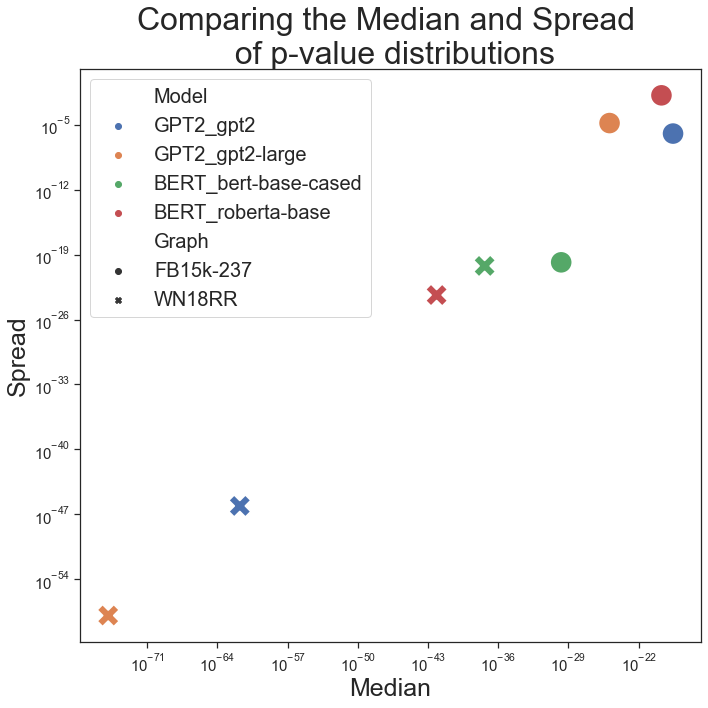

In [27]:
r, n = 25, 1000

summary_stats = []
data = pd.DataFrame(columns=['Graph', 'Model', 'Median', 'Spread'])
for model in ['GPT2_gpt2', 'GPT2_gpt2-large', 'BERT_bert-base-cased', 'BERT_roberta-base']:
    for graph in ['FB15k-237', 'WN18RR']:
        p_vals = np.array(llmkg.get_pvals('../results', model, graph, r, n))
        median = np.median(p_vals)
        spread = np.max(p_vals) - np.min(p_vals)
        print(f"Graph: [{graph}], Model: [{model}] median: {median:.2e} spread: {spread:.2e}")
        summary_stats.append((model, graph, median, spread))
        data = data.append({'Graph': graph, 'Model': model, 'Median': median, 'Spread': spread }, ignore_index=True)
        
        
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(10,10))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Comparing the Median and Spread \n of p-value distributions', fontsize=32)
ax.set_xlabel('Median', fontsize=25)
ax.set_ylabel('Spread', fontsize=25)
sns.scatterplot(data=data, x="Median", y="Spread", hue="Model", style="Graph", s=500)
plt.legend(fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('../results/median.png')
plt.show()


Mean
Median
Spread
Standard Deviation


<Figure size 432x288 with 0 Axes>

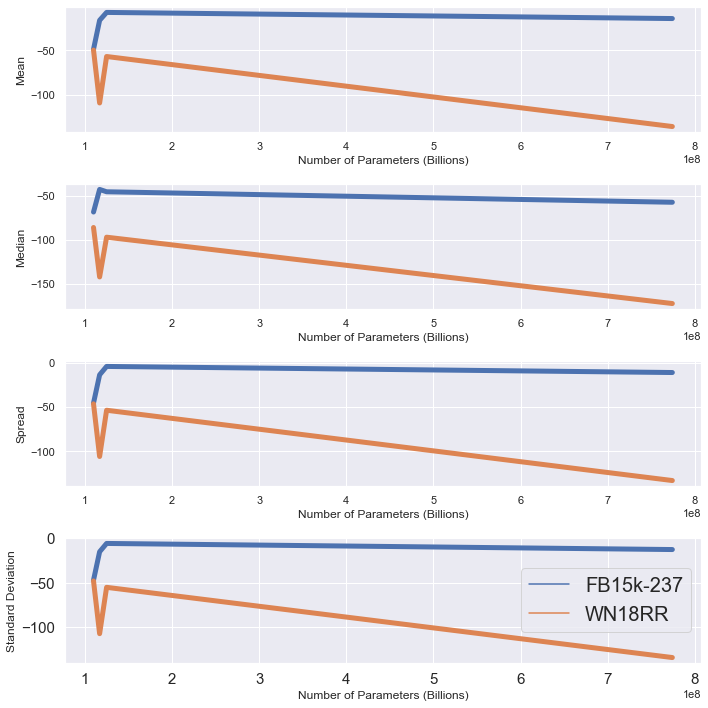

In [18]:
parameters = {
    'BERT_bert-base-cased': 110000000,
    'BERT_roberta-base': 125000000,
    'GPT2_gpt2': 117000000,
    'GPT2_gpt2-large': 774000000
}

r, n = 25, 1000

summary_stats = []
data = pd.DataFrame(columns=['Graph', 'Model', 'Mean', 'Median', 'Spread', 'Standard Deviation', 'Number of Parameters']) #
for graph in ['FB15k-237', 'WN18RR']:
    for model in ['BERT_bert-base-cased', 'BERT_roberta-base', 'GPT2_gpt2', 'GPT2_gpt2-large']:
        p_vals = np.array(llmkg.get_pvals('../results', model, graph, r, n))
        median = float(np.log(np.median(p_vals)))
        spread = float(np.log(np.max(p_vals) - np.min(p_vals)))
        mean = float(np.log(np.mean(p_vals)))
        std = float(np.log(np.std(p_vals)))
        params = float(parameters[model])

        #data = data.append({'Graph': graph, 'Model': model, 'Mean': mean, 'Number of Parameters': params }, ignore_index=True)
        #data = data.append({'Graph': graph, 'Model': model, 'Spread': spread, 'Number of Parameters': params }, ignore_index=True)
        #data = data.append({'Graph': graph, 'Model': model, 'Standard Deviation': std, 'Number of Parameters': params }, ignore_index=True)
        #data = data.append({'Graph': graph, 'Model': model, 'Mean': mean, 'Number of Parameters': params }, ignore_index=True)
        
        
        data = data.append({'Graph': graph, 'Model': model, 'Median': median, 'Spread': spread, 'Mean': mean, 'Standard Deviation': std, 'Number of Parameters': params }, ignore_index=True)

%matplotlib inline
        
plt.clf()
sns.set_theme(style="darkgrid")

f, axes = plt.subplots(4, figsize=(10,10))

for i, metric in enumerate(['Mean', 'Median', 'Spread', 'Standard Deviation']):
    #axes[i].set_xscale('log')
    axes[i].set_xlabel('Number of Parameters (Billions)')
    #axes.set_xlim(1e8, 1e9)
    
    #axes[i].set_ylim(data[metric].min(), data[metric].max())
    #axes.set_ylim(-60, 0)
    #axes[i].set_yscale('log')
    
    #sns.lineplot(data=data, x="Number of Parameters", y=metric, hue="Model", style="Graph", ax=axes[i])
    print(metric)
    sns.lineplot(data=data, x="Number of Parameters", y=metric, hue="Graph", ax=axes[i], linewidth=5)
    axes[i].get_legend().remove()

plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

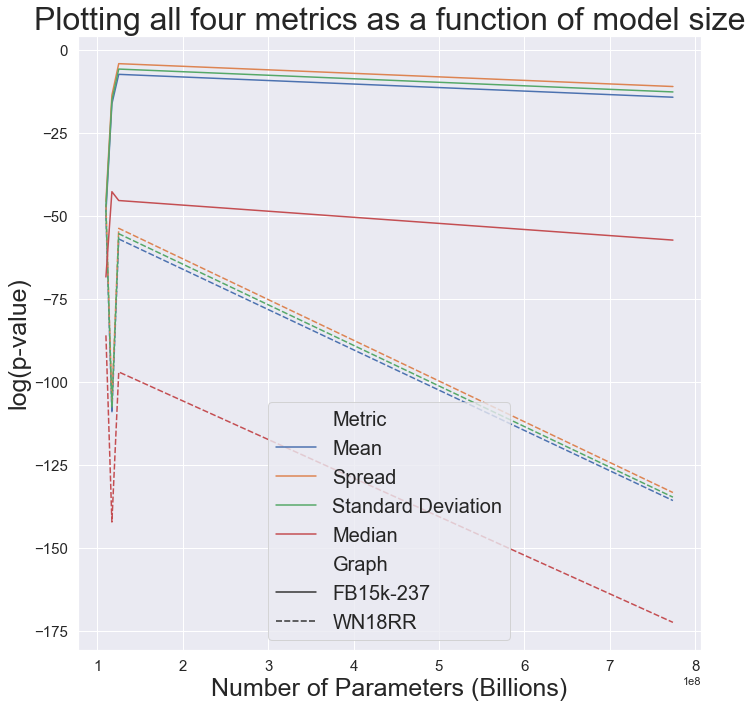

In [20]:
parameters = {
    'BERT_bert-base-cased': 110000000,
    'BERT_roberta-base': 125000000,
    'GPT2_gpt2': 117000000,
    'GPT2_gpt2-large': 774000000
}

r, n = 25, 1000

summary_stats = []
data = pd.DataFrame(columns=['Graph', 'Model', 'Value', 'Metric', 'Number of Parameters']) #
for graph in ['FB15k-237', 'WN18RR']:
    for model in ['BERT_bert-base-cased', 'BERT_roberta-base', 'GPT2_gpt2', 'GPT2_gpt2-large']:
        p_vals = np.array(llmkg.get_pvals('../results', model, graph, r, n))
        median = float(np.log(np.median(p_vals)))
        spread = float(np.log(np.max(p_vals) - np.min(p_vals)))
        mean = float(np.log(np.mean(p_vals)))
        std = float(np.log(np.std(p_vals)))
        params = float(parameters[model])

        data = data.append({'Graph': graph, 'Model': model, 'Value': mean, 'Metric': 'Mean', 'Number of Parameters': params }, ignore_index=True)
        data = data.append({'Graph': graph, 'Model': model, 'Value': spread, 'Metric': 'Spread', 'Number of Parameters': params }, ignore_index=True)
        data = data.append({'Graph': graph, 'Model': model, 'Value': std, 'Metric': 'Standard Deviation', 'Number of Parameters': params }, ignore_index=True)
        data = data.append({'Graph': graph, 'Model': model, 'Value': median, 'Metric': 'Median', 'Number of Parameters': params }, ignore_index=True)
        
        
        #data = data.append({'Graph': graph, 'Model': model, 'Median': median, 'Spread': spread, 'Mean': mean, 'Standard Deviation': std, 'Number of Parameters': params }, ignore_index=True)

%matplotlib inline
        
plt.clf()
sns.set_theme(style="darkgrid")

f, ax = plt.subplots(figsize=(10,10))

ax.set_title('Plotting all four metrics as a function of model size', fontsize=32)
ax.set_xlabel('Number of Parameters (Billions)', fontsize=25)
ax.set_ylabel('log(p-value)', fontsize=25)
sns.lineplot(data=data, x="Number of Parameters", y="Value", style="Graph", hue="Metric", ax=ax)

plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.savefig('../results/model_size.png')
plt.show()